In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [2]:
#Opens the data files for day 1 RXN data
#Com_Nano data files, 2 because turned off the program

print('If there is an error regarding size of dataframe, user may need to create two random column headers, since time is divided by space')
dataFolder = "C:/Users/steph/OneDrive/Desktop/AERTC Thesis/ReactionDataMethanol/"

#Two files, one during the heating and recation, one the following day or so to collect the final pressure
Rxn_Com_Nanos_Day1_P1 = pd.read_csv(dataFolder+'Week_02_25/Com_Nano_Rxn_02_24.txt', delim_whitespace = True)
Rxn_Com_Nanos_Day1_P2 = pd.read_csv(dataFolder+'Week_02_25/Com_Nano_Rxn_02_24_end.txt', delim_whitespace = True) 

#Put the two programs together
Rxn_Com_Nanos_Day1 = pd.concat([Rxn_Com_Nanos_Day1_P1, Rxn_Com_Nanos_Day1_P2], axis = 0, ignore_index=True)

Heater_Com_Nanos_Day1 = Rxn_Com_Nanos_Day1['1']
#2 is the 150 rpm motor, it is not kept track of, but is constant
Pressure_Rxn_Com_Nanos_Day1 = Rxn_Com_Nanos_Day1['3']*10
Temperature_Rxn_Com_Nanos_Day1 = Rxn_Com_Nanos_Day1['4']
#Create a time scale in seconds, use any length in order to get the right time scale
x_Rxn_Com_Nanos_Day1 = np.linspace(0,len(Temperature_Rxn_Com_Nanos_Day1)-1,len(Temperature_Rxn_Com_Nanos_Day1))

If there is an error regarding size of dataframe, user may need to create two random column headers, since time is divided by space


Text(0, 0.5, 'Pressure (psi)')

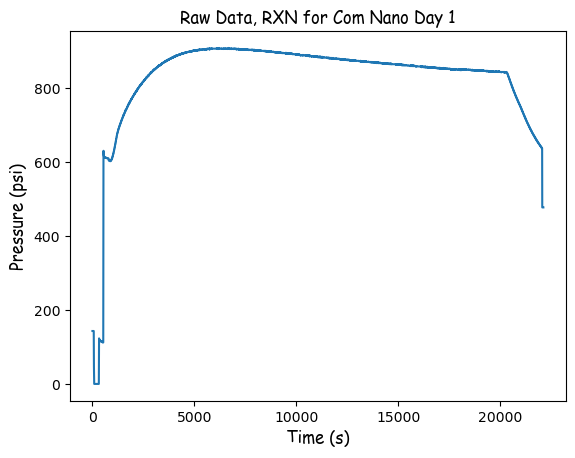

In [3]:
#Plot the raw data for pressure
fontdict = {'fontname': 'comic sans ms', 'fontsize': 12}
plt.plot(x_Rxn_Com_Nanos_Day1,Pressure_Rxn_Com_Nanos_Day1)
plt.title('Raw Data, RXN for Com Nano Day 1', fontdict)
plt.xlabel('Time (s)', fontdict)
plt.ylabel('Pressure (psi)', fontdict)

In [4]:
#find the x value when the rxn starts, therefore pressure starts to decrease
for i in x_Rxn_Com_Nanos_Day1:
    if Pressure_Rxn_Com_Nanos_Day1[i] >= Pressure_Rxn_Com_Nanos_Day1.max(): #Tried setting 'equal to', but that set every value equal to the max, had to re-run code 
        break

#Create another array starting from the start of rxn, so it does not pick up any other slopes
x_Rxn_Start_Com_Nanos_Day1 = np.linspace(int(i),int(len(Pressure_Rxn_Com_Nanos_Day1) - 1), int(len(Pressure_Rxn_Com_Nanos_Day1) - i)) #would not take the numbers unless they were integers, were floats before

#Find the x value when the slope of the temperature starts to drop dramatically, due to reactor shut off
for n in (x_Rxn_Start_Com_Nanos_Day1):
    slope = (Temperature_Rxn_Com_Nanos_Day1[int(n) + 60] - Temperature_Rxn_Com_Nanos_Day1[int(n)]) / (x_Rxn_Com_Nanos_Day1[int(n) + 60] - x_Rxn_Com_Nanos_Day1[int(n)])
    if slope <= -0.1: #The slope of pressure drop is much larger when the reactor is turned off
        break

#Also a loop that finds the time when the reactor heat is turned on
for j in (x_Rxn_Com_Nanos_Day1[0:(len(x_Rxn_Com_Nanos_Day1) - 60)]):
    slope = (Heater_Com_Nanos_Day1[int(j) + 60] - Heater_Com_Nanos_Day1[int(j)]) / (x_Rxn_Com_Nanos_Day1[int(j) + 60] - x_Rxn_Com_Nanos_Day1[int(j)])
    if slope > 0.2: #The slope is higher right when the reactor is turned on
        break
            
#Linspace likes integers over floats, make next step easier    
i = int(i)
n = int(n)
j = int(j)

print('The starting time in when the pressure reaches max is {} seconds'.format(i))
print('The ending time when the reactor is turned off is {} seconds'.format(n))
print('The reaction was left to run for aprroximately {:.0f} minutes'.format((n-i)/60))
print('Once the reactor temperature was set, it took {:.0f} minutes for the reaction to start from max pressure'.format((i-j)/60))

The starting time in when the pressure reaches max is 6199 seconds
The ending time when the reactor is turned off is 20274 seconds
The reaction was left to run for aprroximately 235 minutes
Once the reactor temperature was set, it took 90 minutes for the reaction to start from max pressure


Temperature difference from start of pressure drop to heat off was 11 degrees celsius


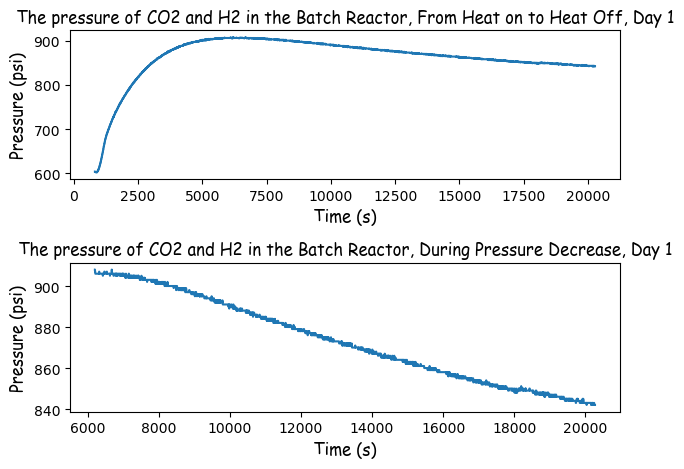

In [5]:
#Now plot the data from the reaction start to the time when the reactor is turned off
plt.subplot(2,1,1)
time_heat = np.linspace(int(x_Rxn_Com_Nanos_Day1[j]), int(x_Rxn_Com_Nanos_Day1[n]) - 1, (int(x_Rxn_Com_Nanos_Day1[n]) - int(x_Rxn_Com_Nanos_Day1[j])))
plt.plot(time_heat,Pressure_Rxn_Com_Nanos_Day1[j:n])
plt.xlabel('Time (s)', fontdict)
plt.ylabel('Pressure (psi)', fontdict)
plt.title('The pressure of CO2 and H2 in the Batch Reactor, From Heat on to Heat Off, Day 1', fontdict)

plt.subplot(2,1,2)
time_rxn = np.linspace(int(x_Rxn_Com_Nanos_Day1[i]), int(x_Rxn_Com_Nanos_Day1[n]) - 1, (int(x_Rxn_Com_Nanos_Day1[n]) - int(x_Rxn_Com_Nanos_Day1[i])))
plt.plot(time_rxn, Pressure_Rxn_Com_Nanos_Day1[i:n])
plt.xlabel('Time (s)', fontdict)
plt.ylabel('Pressure (psi)', fontdict)
plt.title('The pressure of CO2 and H2 in the Batch Reactor, During Pressure Decrease, Day 1', fontdict)

#This rxn is exothermic, and therefore there was a slight temperature increase, despite pressure decreasing
print('Temperature difference from start of pressure drop to heat off was {:.0f} degrees celsius'.format(Temperature_Rxn_Com_Nanos_Day1[n] - Temperature_Rxn_Com_Nanos_Day1[i]))

plt.tight_layout()

The initial moles of CO2 on day 1: 0.08 mols
The initial moles of H2 on day 1: 0.31 mols


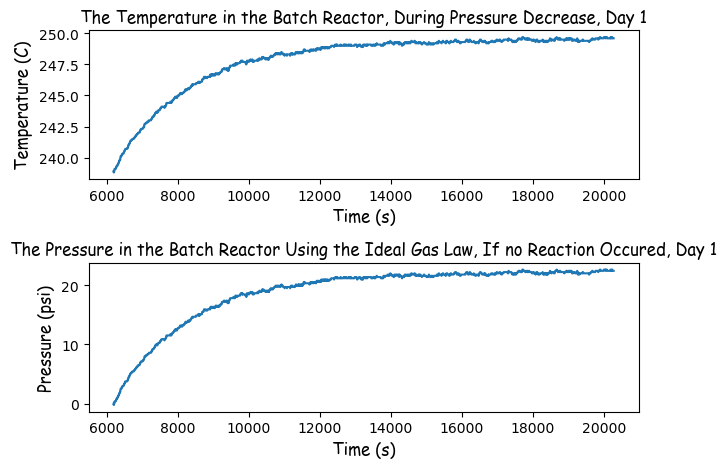

In [6]:
#Plot of the temperature during the pressure change
plt.subplot(2,1,1)
plt.plot(time_rxn, Temperature_Rxn_Com_Nanos_Day1[i:n])
plt.xlabel('Time (s)', fontdict)
plt.ylabel('Temperature (C)', fontdict)
plt.title('The Temperature in the Batch Reactor, During Pressure Decrease, Day 1', fontdict)

#Find expected pressure if there was no pressure drop from max pressure, assuming moles of CO2 did not change before

#Initial moles when temperature is room temperature and inlet pressure was 625 psi
CO2_n0 = (125*6894.76*0.000225)/(8.314*(25+273.15))
H2_n0 = (500*6894.76*0.000225)/(8.314*(25+273.15))

#For volume, we assume hexadecane will stay constant under changing temperature at the moment
P_exp = ((CO2_n0 + H2_n0)*8.314*(Temperature_Rxn_Com_Nanos_Day1[i:n].add(273.15))/0.000225)/6894.76
print('The initial moles of CO2 on day 1: {:.2f} mols'.format(CO2_n0))
print('The initial moles of H2 on day 1: {:.2f} mols'.format(H2_n0))

#plot the actual pressure vs the expected pressure if there was no reaction
plt.subplot(2,1,2)
P_change = (P_exp - P_exp[i]) #P_exp - P_exp[i] will give the absolute difference in pressure
plt.plot(time_rxn, P_change)
plt.xlabel('Time (s)', fontdict)
plt.ylabel('Pressure (psi)', fontdict)
plt.title('The Pressure in the Batch Reactor Using the Ideal Gas Law, If no Reaction Occured, Day 1', fontdict)

plt.tight_layout()

The moles of CO2 reacted according to the pressure change is 0.015 mols
The volume of methanol created is 0.588 mL


Text(0.5, 1.0, 'Assumed Pressure During Reaction While Exothermic Temperature Increase Occurs, Day 1')

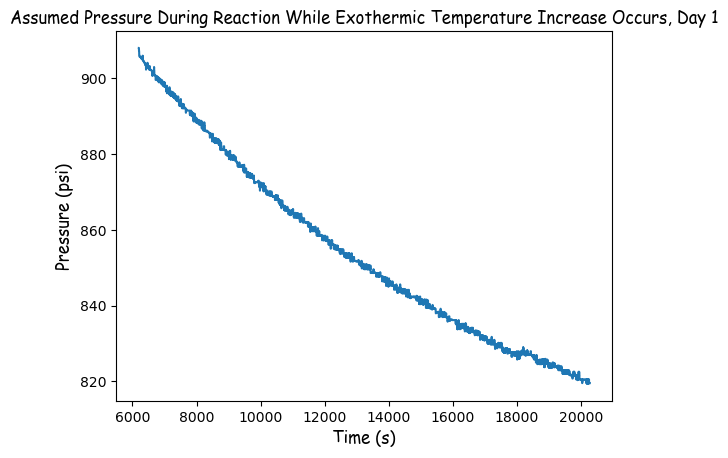

In [7]:
#Convert psi change to moles overall converted, not accounting for temperature change
#The equation for CO2 hydrogenation: CO2 + 3H2 <--> CH3OH + H2O

#Assume ideal conditions, and correct for the pressure change due to temperature increase during pressure drop:
P = ((Pressure_Rxn_Com_Nanos_Day1[i] - P_change[i]) - (Pressure_Rxn_Com_Nanos_Day1[n] - P_change[n - 1]))*6894.76 #Final - initial, convert to m^3 for SI units, convert to Pa
T = (Temperature_Rxn_Com_Nanos_Day1[n] - Temperature_Rxn_Com_Nanos_Day1[i]) + 273.15 #Inital - Final, to avoid negative, convert to K
#V is constnat, equals 0.000225 m^3, because 300 mL reactor and 75 mL is hexadecane

#PV = nRT, could try compresssability or vander waals, but mostly hydrogen and therefore pretty ideal
CO2_n = ((P*0.000225)/(8.314*T))/4 #Divide by 4, as 4 mols react, but only 1 is CO2
print('The moles of CO2 reacted according to the pressure change is {:.3f} mols'.format(CO2_n))
#1:1 ratio of CO2 to methanol
methanol_vol = CO2_n*32.04/0.7913
print('The volume of methanol created is {:.3f} mL'.format(methanol_vol))

#Subtract the expected pressure change, element wise
Pressure_Edit = []
for d in np.linspace(int(x_Rxn_Com_Nanos_Day1[i]), int(x_Rxn_Com_Nanos_Day1[n]) - 1, (int(x_Rxn_Com_Nanos_Day1[n]) - int(x_Rxn_Com_Nanos_Day1[i]))):
    Pressure_Edit.append(Pressure_Rxn_Com_Nanos_Day1[d] - P_change[d])

plt.plot(time_rxn, Pressure_Edit)
plt.xlabel('Time (s)', fontdict)
plt.ylabel('Pressure (psi)', fontdict)
plt.title('Assumed Pressure During Reaction While Exothermic Temperature Increase Occurs, Day 1', fontdict)


The slope of the line equation is -9.318278383164568e-10
The r^2 value for zeroth order is 0.9227


The slope of the line equation is -8.9083942805856e-06
The r^2 value for first order is 0.9322


The slope of the line equation is 0.08524754609710072
The r^2 value for first order is 0.9411



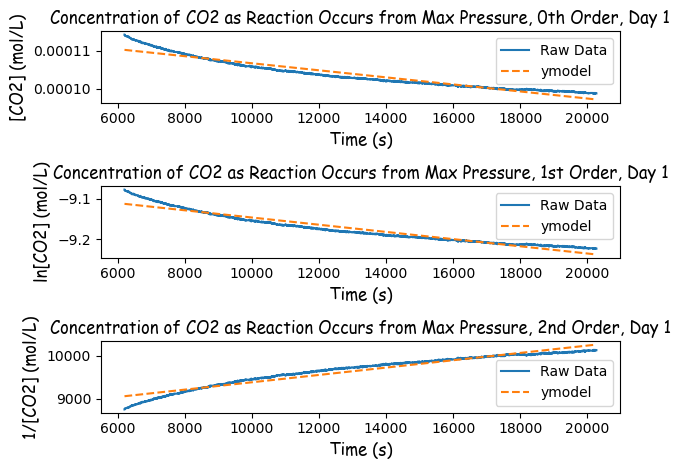

In [8]:
#Need to get concentration change over time though
Pressure_Edit = pd.Series(Pressure_Edit)
CO2_conc = (((Pressure_Edit*0.000225)/(8.314*Temperature_Rxn_Com_Nanos_Day1[i:n].reset_index(drop=True)))/4)/0.225  #0.225 L is the batch reactor volume, which is constant

#define a function of a linear line, to see if any of these plot are linear
def f_lin(x,a0,a1): #for the curve_fit we must put x first
    return a0+ a1*x

#PLot to zeorth order plot---------------------------------------------------------------------------------------------
plt.subplot(3,1,1)
plt.plot(time_rxn,CO2_conc)
plt.xlabel('Time (s)', fontdict)
plt.ylabel('[CO2] (mol/L)', fontdict)
plt.title('Concentration of CO2 as Reaction Occurs from Max Pressure, 0th Order, Day 1', fontdict)

par,cov = curve_fit(f_lin,time_rxn,CO2_conc)   #linear function, x, y data
print('\nThe slope of the line equation is {}'.format(par[1]))
ymodel = f_lin(time_rxn, *par) #* means more than one value attached to said variable
plt.plot(time_rxn, ymodel, linestyle = 'dashed')
plt.legend(['Raw Data','ymodel'])

#Find the residuals
res = CO2_conc - ymodel #Diff between actual and predicted values 
#Find the R^2 value
ss_res = sum(res**2)
ss_tot = sum((CO2_conc - np.mean(CO2_conc))**2)
r2 = round(1-(ss_res/ss_tot),4)
print('The r^2 value for zeroth order is {}\n'.format(r2))

#Plot to first order plot----------------------------------------------------------------------------------------------
plt.subplot(3,1,2)
plt.plot(time_rxn,np.log(CO2_conc)) #np.log is base 10 log, or ln
plt.xlabel('Time (s)', fontdict)
plt.ylabel('ln[CO2] (mol/L)', fontdict)
plt.title('Concentration of CO2 as Reaction Occurs from Max Pressure, 1st Order, Day 1', fontdict)

par,cov = curve_fit(f_lin,time_rxn,np.log(CO2_conc))   #linear function, x, y data
print('\nThe slope of the line equation is {}'.format(par[1]))
ymodel = f_lin(time_rxn, *par) #* means more than one value attached to said variable
plt.plot(time_rxn, ymodel, linestyle = 'dashed')
plt.legend(['Raw Data','ymodel'])

#Find the residuals
res = np.log(CO2_conc) - ymodel #Diff between actual and predicted values 
#Find the R^2 value
ss_res = sum(res**2)
ss_tot = sum((np.log(CO2_conc) - np.mean(np.log(CO2_conc)))**2)
r2 = round(1-(ss_res/ss_tot),4)
print('The r^2 value for first order is {}\n'.format(r2))

#Plot to second order plot---------------------------------------------------------------------------------------------
plt.subplot(3,1,3)
plt.plot(time_rxn, 1/CO2_conc) #np.log is base 10 log, or ln
plt.xlabel('Time (s)', fontdict)
plt.ylabel('1/[CO2] (mol/L)', fontdict)
plt.title('Concentration of CO2 as Reaction Occurs from Max Pressure, 2nd Order, Day 1', fontdict)

par,cov = curve_fit(f_lin,time_rxn, 1/CO2_conc)   #linear function, x, y data
print('\nThe slope of the line equation is {}'.format(par[1]))
ymodel = f_lin(time_rxn, *par) #* means more than one value attached to said variable
plt.plot(time_rxn, ymodel, linestyle = 'dashed')
plt.legend(['Raw Data','ymodel'])

#Find the residuals
res = 1/CO2_conc - ymodel #Diff between actual and predicted values 
#Find the R^2 value
ss_res = sum(res**2)
ss_tot = sum(((1/CO2_conc) - np.mean(1/CO2_conc))**2)
r2 = round(1-(ss_res/ss_tot),4)
print('The r^2 value for first order is {}\n'.format(r2))


plt.tight_layout()